<a href="https://colab.research.google.com/github/Nareshjanne123/Data-Science-Assignments/blob/main/Random_Forest_for_Company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
from google.colab import files
upload=files.upload()


Saving Company_Data (1).csv to Company_Data (1).csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
median_sales=df["Sales"].median()

In [4]:
df["Sales"]=["High" if value > median_sales
             else "Low" for value in df["Sales"]]
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Columns_to_encoder=["Sales","ShelveLoc","Urban","US"]
for column in Columns_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [6]:
X=df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [7]:
Y=df["Sales"]
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

In [8]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,-0.035578,-0.123460,-0.251910,-0.069327,0.392275,-0.106962,0.186707,0.028847,0.047090,-0.142579
CompPrice,-0.035578,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.123460,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.251910,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.069327,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.392275,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,-0.106962,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,0.186707,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.028847,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.047090,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [10]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion ='entropy',max_depth=3)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [11]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training Data:",ac1.round(3))
print("accuracy Score Test Data:",ac2.round(3))

Accuracy Score Training Data: 0.757
accuracy Score Test Data: 0.6


In [13]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=150,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6, n_estimators=150)

In [14]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Random Forest for Training Data:",ac1.round(3))
print("Random Forest For Test Data:",ac2.round(3))

Random Forest for Training Data: 0.993
Random Forest For Test Data: 0.68


[Text(0.5416666666666666, 0.875, 'x[4] <= 134.5\nentropy = 1.0\nsamples = 300\nvalue = [148, 152]'),
 Text(0.3333333333333333, 0.625, 'x[5] <= 0.5\nentropy = 0.982\nsamples = 247\nvalue = [143, 104]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 96.5\nentropy = 0.826\nsamples = 54\nvalue = [14, 40]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.519\nsamples = 43\nvalue = [5, 38]'),
 Text(0.25, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.5, 0.375, 'x[5] <= 1.5\nentropy = 0.917\nsamples = 193\nvalue = [129, 64]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.99\nsamples = 145\nvalue = [81, 64]'),
 Text(0.75, 0.625, 'x[0] <= 142.5\nentropy = 0.451\nsamples = 53\nvalue = [5, 48]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.8333333333333334, 0.375, 'x[4] <= 142.5\nentropy = 0.831\nsamples = 19\nvalue = [5, 14]'),
 Text(0.75, 0.125, 'entrop

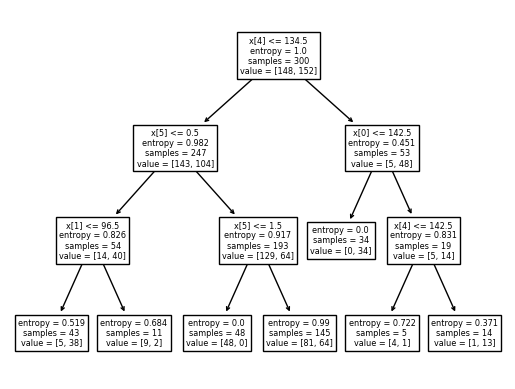

In [16]:
from sklearn import tree
tree.plot_tree(DTC)

AttributeError: 'list' object has no attribute 'splitlines'

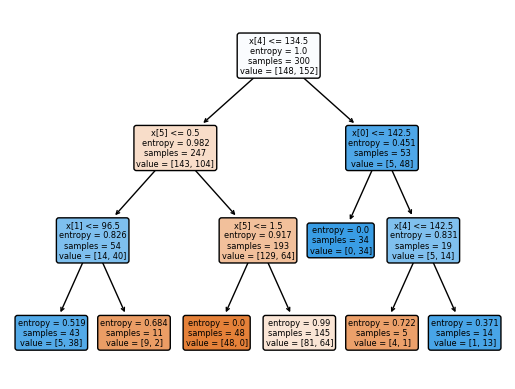

In [36]:
from sklearn import tree
import graphviz

data=tree.plot_tree(DTC,filled=True,rounded=True)
graph=graphviz.Source(data)
graph
